In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading dataset and understanding different features given in dataset.

In [436]:
#Read the datasets
companies = pd.read_csv('companies.csv', encoding= 'unicode_escape')
rounds2 = pd.read_csv('rounds2.csv',encoding= 'unicode_escape')


In [437]:
#CP1: Understanding the datasets and filling table 1.1

#Unique companies in rounds2
#Coverting "company_permalink" column into Title case to have a common format across all rows.
rounds2.company_permalink = rounds2.company_permalink.str.title()

#Handling non-ascii characters in dataset
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))

#Finding unique companies
rounds2.company_permalink.describe()



count                       114949
unique                       66368
top       /Organization/Solarflare
freq                            19
Name: company_permalink, dtype: object

In [438]:
#Coverting "permalink" column into Title case to have a common format across all rows.
companies.permalink = companies.permalink.str.title()

#Handling non-ascii characters in dataset
companies['permalink'] = companies['permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))

#Unique companies in companies dataframe
companies.permalink.describe()

count                       66368
unique                      66368
top       /Organization/Ortho-Tag
freq                            1
Name: permalink, dtype: object

In [439]:
#unique column in companies dataframe
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Ortho-Tag,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [8]:
#comparing companies across 2 dataframes

rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [440]:
#Creating Master data frame
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [441]:
#CP2- Analyzing data across different funding types
#---------------------------------------------------#
#Looking for null values in dataframe

master_frame.isnull().sum()

#Grouping the data by "funding_round_type" and taking average of "raised_amount"
pd.set_option('display.float_format', lambda x: '%.3f' % x)
rt_groupby = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()

#Displaying investment amount for venture, angel, seed, and private_equity funding type
print('venture: ' + str(round(rt_groupby['venture'], 2)) + '\n' +
      'angel: ' + str(round(rt_groupby['angel'],2)) + '\n' +
      'seed: ' + str(round(rt_groupby['seed'],2)) + '\n' +
      'private_equity: ' + str(round(rt_groupby['private_equity'],2)))






venture: 11748949.13
angel: 958694.47
seed: 719818.0
private_equity: 73308593.03


In [442]:
#CP3 - Country Analysis
#---------------------------#

#creating a dataframe for investment type "Venture"
venture = master_frame[master_frame.funding_round_type.isin(['venture'])]

#Reset the index
venture.reset_index(inplace=True, drop=True)

#Grouping data by country and finding top 9 countries with highest investment
v_groupby = (venture.groupby(['country_code'])['raised_amount_usd'].sum()).nlargest(9)
v_groupby

country_code
USA   422510842796.000
CHN    39835418773.000
GBR    20245627416.000
IND    14391858718.000
CAN     9583332317.000
FRA     7259536732.000
ISR     6907514579.000
DEU     6346959822.000
JPN     3363676611.000
Name: raised_amount_usd, dtype: float64

In [12]:
#Create Dataframe with top 9 countries data
top9 = venture[venture.country_code.isin(v_groupby.index.values.tolist())]

#Reset the index
top9.reset_index(inplace=True, drop=True)
top9.head(15)



,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
3,/Organization/004-Technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
4,/Organization/0Ndine-Biomedical-Inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
5,/Organization/0Xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
6,/Organization/0Xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
7,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
9,/Organization/10-Minutes-With,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,/Organization/10-Minutes-With,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013


In [443]:
#CP4 - Sector Analysis 1
#----------------------------#

#Extracting Primary Sector information from Category_List column
top9['primary_sector'] = top9['category_list'].str.split('|', expand = True)[0]
top9.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48099 entries, 0 to 48098
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        48099 non-null  object 
 1   funding_round_permalink  48099 non-null  object 
 2   funding_round_type       48099 non-null  object 
 3   funding_round_code       26930 non-null  object 
 4   funded_at                48099 non-null  object 
 5   raised_amount_usd        44383 non-null  float64
 6   permalink                48099 non-null  object 
 7   name                     48099 non-null  object 
 8   homepage_url             45902 non-null  object 
 9   category_list            47614 non-null  object 
 10  status                   48099 non-null  object 
 11  country_code             48099 non-null  object 
 12  state_code               47768 non-null  object 
 13  region                   47596 non-null  object 
 14  city                  

In [444]:
#import mapping file

mapping = pd.read_csv('mapping.csv')

#Remove null rows from mapping file

mapping = mapping[~mapping.category_list.isnull()]

#Clean category list column in mapping file to replace "0" in alphanumeric text with "na" and retain "0" in other cases
import re
mapping.category_list = mapping.category_list.apply(lambda x : x.replace('0', 'na') if re.match('^[a-zA-Z0-9\s]+$', x) else x)
mapping.head()
mapping.category_list.value_counts()


Flowers              1
Pets                 1
Interface Design     1
Publishing           1
Enterprise Search    1
                    ..
Medical              1
Architecture         1
Mobile Social        1
Micro-Enterprises    1
Risk Management      1
Name: category_list, Length: 687, dtype: int64

In [445]:
# Transforming mapping dataframe using melt function
#--------------------------------------------------------#

# Storing main_sectors in a variable
columns = list(mapping.keys())[1:]

#Creating a new dataframe to store the mapping data in long Format
mapping_n = pd.melt(mapping, id_vars = 'category_list', value_vars = columns)

#Removing rows with value = 0
mapping_n = mapping_n[mapping_n.value == 1]

#Renaming column "variable" to "main_sector"
mapping_n = mapping_n.rename(columns={'variable': 'main_sector'})

#mapping_n has total of 687 rows with 8 unique main_sectors
mapping_n.info()
mapping_n.main_sector.unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 7 to 6158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
 2   value          687 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


array(['Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], dtype=object)

In [446]:
#Merge top9 and mapping_n to map primary sector with it's main sector
merged = pd.merge(top9, mapping_n, how='left', left_on='primary_sector', right_on='category_list')


#Drop and rename columns to retain only necessary columns
merged = merged.drop(columns = ['category_list_y','value'])
merged = merged.rename(columns = {'category_list_x': 'category_list'})
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48099 entries, 0 to 48098
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        48099 non-null  object 
 1   funding_round_permalink  48099 non-null  object 
 2   funding_round_type       48099 non-null  object 
 3   funding_round_code       26930 non-null  object 
 4   funded_at                48099 non-null  object 
 5   raised_amount_usd        44383 non-null  float64
 6   permalink                48099 non-null  object 
 7   name                     48099 non-null  object 
 8   homepage_url             45902 non-null  object 
 9   category_list            47614 non-null  object 
 10  status                   48099 non-null  object 
 11  country_code             48099 non-null  object 
 12  state_code               47768 non-null  object 
 13  region                   47596 non-null  object 
 14  city                  

In [447]:
#CP5 : Sector Analysis 2
#----------------------------------------#

#Creating Dataframes for top 3 countries
D1_ini = merged[(merged.country_code == 'USA') & ((merged.raised_amount_usd >= 5000000) & (merged.raised_amount_usd <= 15000000))]
D1_ini.country_code.unique()

D2_ini = merged[(merged.country_code == 'GBR') & ((merged.raised_amount_usd >= 5000000) & (merged.raised_amount_usd <= 15000000))]
D2_ini.country_code.unique()

D3_ini = merged[(merged.country_code == 'IND') & ((merged.raised_amount_usd >= 5000000) & (merged.raised_amount_usd <= 15000000))]
D3_ini.country_code.unique()

array(['IND'], dtype=object)

In [448]:
#Reset index for each data frame
D1_ini.reset_index(inplace=True, drop=True)
D2_ini.reset_index(inplace=True, drop=True)
D3_ini.reset_index(inplace=True, drop=True)

In [449]:
# Create "Investment Count" and "Total Amount Invested" columns for each dataframe

#D1 : Group by main_sector
D1_ini_group_count = D1_ini.groupby(['main_sector'],as_index=False)[['raised_amount_usd']].count().rename(columns={'raised_amount_usd': 'total_investment_count'})
D1_ini_group_sum = D1_ini.groupby(['main_sector'],as_index=False)[['raised_amount_usd']].sum().rename(columns={'raised_amount_usd': 'total_amount_invested'})


In [450]:
# Create "Investment Count" and "Total Amount Invested" columns for each dataframe

#D2 : Group by main_sector
D2_ini_group_count = D2_ini.groupby(['main_sector'],as_index=False)[['raised_amount_usd']].count().rename(columns={'raised_amount_usd': 'total_investment_count'})
D2_ini_group_sum = D2_ini.groupby(['main_sector'],as_index=False)[['raised_amount_usd']].sum().rename(columns={'raised_amount_usd': 'total_amount_invested'})


In [452]:
# Create "Investment Count" and "Total Amount Invested" columns for each dataframe

#D3 : Group by main_sector
D3_ini_group_count = D3_ini.groupby(['main_sector'],as_index=False)[['raised_amount_usd']].count().rename(columns={'raised_amount_usd': 'total_investment_count'})
D3_ini_group_sum = D3_ini.groupby(['main_sector'],as_index=False)[['raised_amount_usd']].sum().rename(columns={'raised_amount_usd': 'total_amount_invested'})


In [453]:
#Merge grouped dataframes with main dataframes
from functools import reduce

D1 = reduce(lambda left,right: pd.merge(left,right, on='main_sector'), [D1_ini, D1_ini_group_count, D1_ini_group_sum])
D2 = reduce(lambda left,right: pd.merge(left,right, on='main_sector'), [D2_ini, D2_ini_group_count, D2_ini_group_sum])
D3 = reduce(lambda left,right: pd.merge(left,right, on='main_sector'), [D3_ini, D3_ini_group_count, D3_ini_group_sum])





In [454]:
#Find out answers for Table 5.1

#Total number of investments (count) and Total amount of investment (USD) for each country

print('USA Total number of investment: ' + str(D1.raised_amount_usd.count()) + '\n' +
      'USA Total amount of investment: ' + str(D1.raised_amount_usd.sum()) + '\n' +
      'GBR Total number of investment: ' + str(D2.raised_amount_usd.count()) + '\n' +
      'GBR Total amount of investment: ' + str(D2.raised_amount_usd.sum()) + '\n' +
      'IND Total number of investment: ' + str(D3.raised_amount_usd.count()) + '\n' +
      'IND Total amount of investment: ' + str(D3.raised_amount_usd.sum()))


USA Total number of investment: 12012
USA Total amount of investment: 107318294664.0
GBR Total number of investment: 619
GBR Total amount of investment: 5365228300.0
IND Total number of investment: 328
IND Total amount of investment: 2949543602.0


In [455]:
#Top 3 sector for each country
#USA
D1_ini_group_count.sort_values('total_investment_count', ascending=False)
      

,main_sector,total_investment_count
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714
1,Cleantech / Semiconductors,2300
5,"News, Search and Messaging",1582
3,Health,909
4,Manufacturing,799
2,Entertainment,591
0,Automotive & Sports,167


In [456]:
#GBR
D2_ini_group_count.sort_values('total_investment_count', ascending=False)

,main_sector,total_investment_count
6,Others,147
7,"Social, Finance, Analytics, Advertising",133
1,Cleantech / Semiconductors,128
5,"News, Search and Messaging",73
2,Entertainment,56
4,Manufacturing,42
3,Health,24
0,Automotive & Sports,16


In [457]:
#IND
D3_ini_group_count.sort_values('total_investment_count', ascending=False)

,main_sector,total_investment_count
6,Others,110
7,"Social, Finance, Analytics, Advertising",60
5,"News, Search and Messaging",52
2,Entertainment,33
4,Manufacturing,21
1,Cleantech / Semiconductors,20
3,Health,19
0,Automotive & Sports,13


In [458]:
# Finding Top Company of Top 2 Best Sectors in each Country

#USA
D1[D1.main_sector.isin(['Others'])].groupby('company_permalink')['raised_amount_usd'].sum().nlargest(1)
D1[D1.main_sector.isin(['Social, Finance, Analytics, Advertising'])].groupby('company_permalink')['raised_amount_usd'].sum().nlargest(1)

#GBR
D2[D2.main_sector.isin(['Others'])].groupby('company_permalink')['raised_amount_usd'].sum().nlargest(1)
D2[D2.main_sector.isin(['Social, Finance, Analytics, Advertising'])].groupby('company_permalink')['raised_amount_usd'].sum().nlargest(1)

#IND
D3_Final[D3_Final.main_sector.isin(['Others'])].groupby('company_permalink')['raised_amount_usd'].sum().nlargest(1)
D3_Final[D3_Final.main_sector.isin(['Social, Finance, Analytics, Advertising'])].groupby('company_permalink')['raised_amount_usd'].sum().nlargest(1)


company_permalink
/Organization/Manthan-Systems   50700000.000
Name: raised_amount_usd, dtype: float64

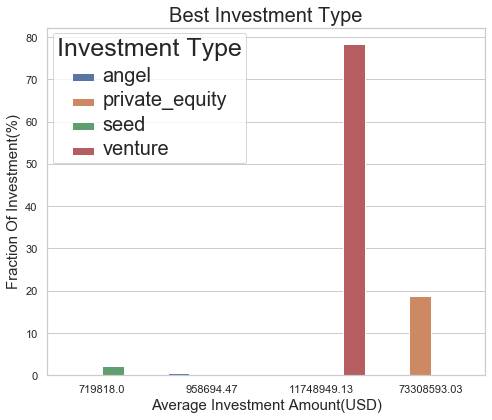

In [459]:
#Plot1
#Creating a dataframe to store average investment amount & fraction of investment for four FT

data = master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]
plot = data.groupby(data.funding_round_type)['raised_amount_usd'].agg(['sum', 'mean']).reset_index()
plot = plot.rename(columns = {'sum': 'Total_Investment', 'mean': 'Average_Investment'})
plot['Proportion'] = 100*((plot.Total_Investment)/(plot.Total_Investment.sum()))

#Plotting Data using Seaborn Barplot
#Using Seaborn, because it works best with dataframes
plt.figure(figsize=(7,6))
ax = sns.barplot(x= round(plot.Average_Investment, 2), y = 'Proportion', hue = 'funding_round_type', data = plot )

#set labels
plt.xlabel("Average Investment Amount(USD)", size=15)
plt.ylabel("Fraction Of Investment(%)", size=15)
plt.title("Best Investment Type", size=20)
plt.tight_layout()
plt.savefig("Best Investment Type.png", dpi=100)
ax.legend().set_title('Investment Type')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
plt.show()


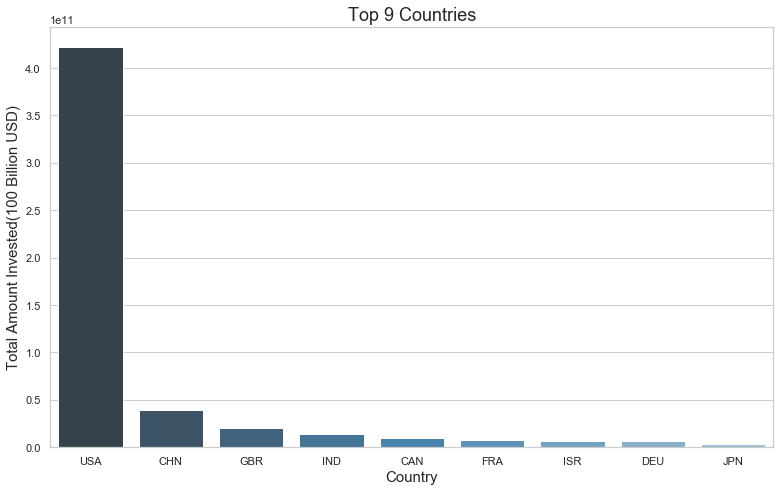

In [460]:
#Plot 2
#Using Bar Chart since we have one categorical variable and one numerical variable
#Using Seaborn, because it works best with dataframes
sns.set(style="whitegrid")
plt.figure(figsize=(11,7))
#plt.ylim(1000000,500000000000)

result = top9.groupby(["country_code"])['raised_amount_usd'].aggregate(np.sum).reset_index().sort_values('raised_amount_usd', ascending = False)
sns.barplot(data= top9, x = 'country_code', y='raised_amount_usd',estimator=sum, ci=None, palette="Blues_d", order = result['country_code'] )

#set labels
plt.xlabel("Country", size=15)
plt.ylabel("Total Amount Invested(100 Billion USD)", size=15)
plt.title("Top 9 Countries", size=18)
plt.tight_layout()
plt.savefig("Top_9_Countries.png", dpi=100)

plt.show()



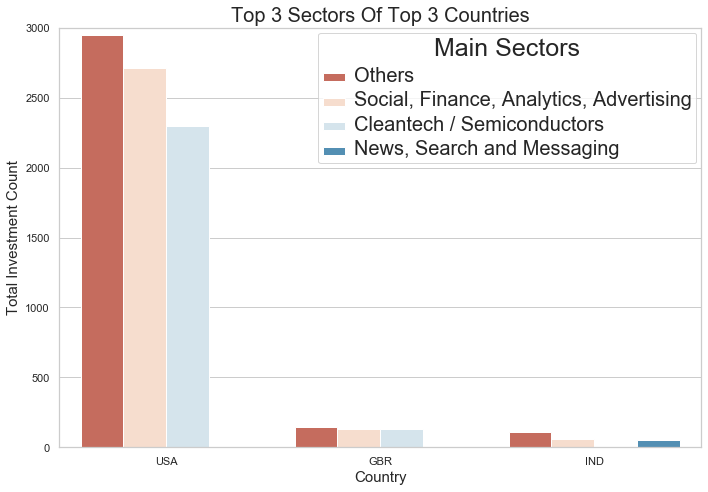

In [461]:
#Plot 3: Top 3 Sectors of Top 3 Countries
group_ini = merged[(merged.country_code.isin(['USA','GBR','IND'])) & ((merged.raised_amount_usd >= 5000000) & (merged.raised_amount_usd <= 15000000))]
group = (group_ini.groupby(['country_code', 'main_sector'])[['raised_amount_usd']].count()).sort_values(['country_code','raised_amount_usd'], ascending = False, axis=0)

group_f = group.groupby(['country_code']).head(3)
group_f = group_f.reset_index()


#Using SeaBorn Bar plot since Seaborn works best with DataFrames
plt.figure(figsize=(10,7))
plt.ylim(0,3000)
plot = sns.barplot(data = group_f, x='country_code', y= 'raised_amount_usd',hue='main_sector',ci=None,order= ('USA','GBR','IND'), palette="" )

#set labels
plt.xlabel("Country", size=15)
plt.ylabel("Total Investment Count", size=15)
plt.title("Top 3 Sectors Of Top 3 Countries", size=20)
plt.tight_layout()
plt.savefig("Top 3 Sectors Of Top 3 Countries.png", dpi=100)
plot.legend().set_title('Main Sectors')
plt.setp(plot.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='25') # for legend title


plt.show()





### Conclusion:

1. After thorough analysis and keeping certain constraints in mind, we can conclude that Venture is the best investment type for Spark Fund

2. It is also observed that, investing in countries: USA, United Kingdom(Great Britain), and India would prove to be most beneficial.

3. Most promising sectors in these countries are : “Others”, “Social,Finance,Analytics, Advertising”, “Cleantech / Semiconductors”, “News, Search, and Messaging”.